# NOMOR 1

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy

In [ ]:
v_beasiswa = np.arange(0, 3.02, 0.05) # 0-3
v_nilai = np.arange(0, 4.02, 0.05) # 0-4
v_pendapatan = np.arange(0, 20.02, 0.05) # 0-20

## Input Nilai

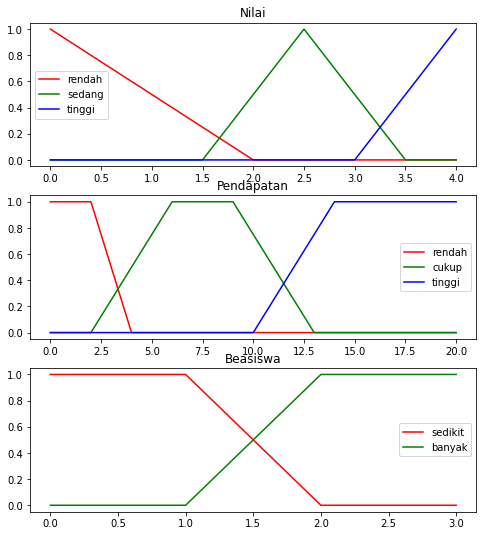

In [ ]:
%matplotlib inline
_, (mf1, mf2, mf3) = plt.subplots(nrows=3, figsize=(8,9))

# INPUT NILAI
fuzzy_nilai_rendah = skfuzzy.trimf(v_nilai, [0, 0, 2])
fuzzy_nilai_sedang = skfuzzy.trimf(v_nilai, [1.5, 2.5, 3.5])
fuzzy_nilai_tinggi = skfuzzy.trimf(v_nilai, [3, 4, 4])

mf1.plot(v_nilai, fuzzy_nilai_rendah, "r", label="rendah")
mf1.plot(v_nilai, fuzzy_nilai_sedang, "g", label="sedang")
mf1.plot(v_nilai, fuzzy_nilai_tinggi, "b", label="tinggi")
mf1.set_title("Nilai")
mf1.legend()

# INPUT PENDAPATAN
fuzzy_pendapatan_rendah = skfuzzy.trapmf(v_pendapatan, [0, 0, 2, 4])
fuzzy_pendapatan_cukup = skfuzzy.trapmf(v_pendapatan, [2, 6, 9, 13])
fuzzy_pendapatan_tinggi = skfuzzy.trapmf(v_pendapatan, [10, 14, 20, 20])

mf2.plot(v_pendapatan, fuzzy_pendapatan_rendah, "r", label="rendah")
mf2.plot(v_pendapatan, fuzzy_pendapatan_cukup, "g", label="cukup")
mf2.plot(v_pendapatan, fuzzy_pendapatan_tinggi, "b", label="tinggi")
mf2.set_title("Pendapatan")
mf2.legend()

# OUTPUT BEASISWA
fuzzy_beasiswa_sedikit = skfuzzy.trapmf(v_beasiswa, [0, 0, 1, 2])
fuzzy_beasiswa_banyak = skfuzzy.trapmf(v_beasiswa, [1, 2, 3, 3])

mf3.plot(v_beasiswa, fuzzy_beasiswa_sedikit, "r", label="sedikit")
mf3.plot(v_beasiswa, fuzzy_beasiswa_banyak, "g", label="banyak")
mf3.set_title("Beasiswa")
mf3.legend()


## Input Data

In [ ]:
data_nilai = 3.5
data_pendapatan = 2.5

## Fuzzifikasi

In [ ]:
# Fuzzifikasi Variable Input Nilai
mu_nilai_rendah = skfuzzy.interp_membership(v_nilai, fuzzy_nilai_rendah, data_nilai)
mu_nilai_sedang = skfuzzy.interp_membership(v_nilai, fuzzy_nilai_sedang, data_nilai)
mu_nilai_tinggi = skfuzzy.interp_membership(v_nilai, fuzzy_nilai_tinggi, data_nilai)

# Fuzzifikasi Variable input pendapatan
mu_pendapatan_rendah = skfuzzy.interp_membership(v_pendapatan, fuzzy_pendapatan_rendah, data_pendapatan)
mu_pendapatan_cukup = skfuzzy.interp_membership(v_pendapatan, fuzzy_pendapatan_cukup, data_pendapatan)
mu_pendapatan_tinggi = skfuzzy.interp_membership(v_pendapatan, fuzzy_pendapatan_tinggi, data_pendapatan)

# ------------------------------------------
print("Fuzzifikasi Variable Input Nilai")
print("mu nilai-rendah =", mu_nilai_rendah)
print("mu nilai-sedang =", mu_nilai_sedang)
print("mu nilai-tinggi =", mu_nilai_tinggi)

print("\nFuzzifikasi Variable input pendapatan")
print("mu pendapatan-rendah =", mu_pendapatan_rendah)
print("mu pendapatan-cukup  =", mu_pendapatan_cukup)
print("mu pendapatan-tinggi =", mu_pendapatan_tinggi)

Fuzzifikasi Variable Input Nilai
mu nilai-rendah = 0.0
mu nilai-sedang = 0.0
mu nilai-tinggi = 0.5

Fuzzifikasi Variable input pendapatan
mu pendapatan-rendah = 0.75
mu pendapatan-cukup  = 0.125
mu pendapatan-tinggi = 0.0


## Operasi Fuzzy    

1. IF nilai rendah AND pendapatan rendah THEN beasiswa sedikit
2. IF nilai sedang AND pendapatan cukup THEN beasiswa sedikit
3. IF nilai tinggi AND pendapatan cukup THEN beasiswa sedikit
4. IF nilai tinggi AND pendapatan rendah THEN beasiswa banyak

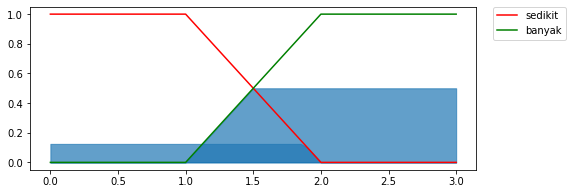

In [ ]:
%matplotlib inline
# Antacendent
AM1 = np.fmin(mu_nilai_rendah, mu_pendapatan_rendah)
AM2 = np.fmin(mu_nilai_sedang, mu_pendapatan_cukup)
AM3 = np.fmin(mu_nilai_tinggi, mu_pendapatan_cukup)
AM4 = np.fmin(mu_nilai_tinggi, mu_pendapatan_rendah)

# operasikan antacendent dengan consequnt
R1 = np.fmin(AM1, fuzzy_beasiswa_sedikit)
R2 = np.fmin(AM2, fuzzy_beasiswa_sedikit)
R3 = np.fmin(AM3, fuzzy_beasiswa_sedikit)
R4 = np.fmin(AM4, fuzzy_beasiswa_banyak)

_, ax1 = plt.subplots(1,figsize=(8,3))
ax1.plot(v_beasiswa, fuzzy_beasiswa_sedikit, "r" , label="sedikit")
ax1.plot(v_beasiswa, fuzzy_beasiswa_banyak, "g", label="banyak")
ax1.fill_between(v_beasiswa, R1, color='C0', alpha=0.7)
ax1.fill_between(v_beasiswa, R2, color='C0', alpha=0.7)
ax1.fill_between(v_beasiswa, R3, color='C0', alpha=0.7)
ax1.fill_between(v_beasiswa, R4, color='C0', alpha=0.7)
ax1.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)

In [ ]:
# Aggregate semua output
aggregated = np.fmax(R1, np.fmax(R2, np.fmax(R3, R4)))

# Defuzzifikasi
output = skfuzzy.defuzz(v_beasiswa, aggregated, "centroid")
output

1.9096404215747054

# NOMOR 2

## Aturan Fuzzy
1. IF nilai rendah AND pendapatan rendah THEN beasiswa = 0.1 * nilai + 0.2 * pendapatan
2. IF nilai sedang AND pendapatan cukup  THEN beasiswa = 0.2 * nilai + 0.2 * pendapatan
3. IF nilai tinggi AND pendapatan cukup  THEN beasiswa = 0.4 * nilai + 0.2 * pendapatan
4. IF nilai tinggi AND pendapatan rendah THEN beasiswa = 0.5 * nilai + 0.3 * pendapatan

In [ ]:
# Antacendent
AM1 = np.fmin(mu_nilai_rendah, mu_pendapatan_rendah)
AM2 = np.fmin(mu_nilai_sedang, mu_pendapatan_cukup)
AM3 = np.fmin(mu_nilai_tinggi, mu_pendapatan_cukup)
AM4 = np.fmin(mu_nilai_tinggi, mu_pendapatan_rendah)
 
R1 = 0.1 * data_nilai + 0.2 * data_pendapatan
R2 = 0.2 * data_nilai + 0.2 * data_pendapatan
R3 = 0.4 * data_nilai + 0.2 * data_pendapatan
R4 = 0.5 * data_nilai + 0.3 * data_pendapatan

## Output

output = $\displaystyle\sum_{i=1} ^{n} \frac{w_i z_i}{w_i}$

In [ ]:
output = sum([R1 * AM1, R2 * AM2, R3 * AM3, R4 * AM4]) / sum([AM1, AM2, AM3, AM4])
output

2.38

**Hasil :**  
berdasarkan percobaan perhitungan maka mahasiswa yang memiliki IPK bernilai 3.5 dengan pendapatan orang tua sebesar 2,5 juta maka beasiswa yag diperoleh adalah sebesar **2,38 juta**.